**FUll machine learning**


*Linear Regression*

In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [32]:
df=pd.read_csv("/content/sample_data/alldata/houserprices.csv")
df=df[["area","price"]]
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df

,area,price
0,2600.0,550000.0
1,3000.0,565000.0
2,3200.0,610000.0
3,3600.0,680000.0
4,4000.0,725000.0


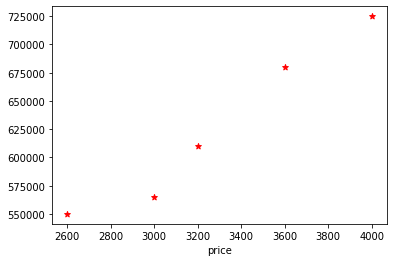

In [33]:
%matplotlib inline
plt.xlabel("area")
plt.xlabel("price")
plt.scatter(df["area"],df["price"],color="red",marker="*")

In [35]:
new_df = df.drop('price',axis='columns')
new_df
price=df["price"]

In [37]:
reg=linear_model.LinearRegression()
model = reg.fit(new_df,price)


In [38]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(model.coef_)
print(model.intercept_)

[135.78767123]
180616.43835616432


In [43]:
model.predict([[3000]])

array([587979.45205479])

In [45]:
area_df =pd.read_csv("/content/sample_data/alldata/area.csv")
area_df

,area
0,1000
1,2000
2,3000


In [49]:
p=model.predict(area_df)

In [50]:
area_df['prices']=p
area_df

,area,prices
0,1000,316404.109589
1,2000,452191.780822
2,3000,587979.452055


Exercise ML

In [57]:
canada =pd.read_csv("/content/sample_data/alldata/canada.csv")
canada.head()
canada.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [ ]:
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(canada["year"],canada["per capita income (US$)"])
#plt.line(canada["year"],canada["per capita income (US$)"])

In [63]:
income=canada["per capita income (US$)"]

In [65]:
reg_canada=linear_model.LinearRegression()
model_canada=reg_canada.fit(canada[["year"]],income)

In [68]:
predict_income=model_canada.predict([[2020]])
print(predict_income)

[41288.69409442]


**2_linear_regression_multivariate**

In [70]:
df_home=pd.read_csv("/content/sample_data/alldata/homeprices.csv")
df_home

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [73]:
df_home.bedrooms=df_home.bedrooms.fillna(df_home.bedrooms.median())
df_home

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [79]:
home_reg=linear_model.LinearRegression()
home_model=home_reg.fit(df_home.drop("price",axis="columns"),df_home["price"])

In [81]:
home_model.predict([[2500, 4, 5]])

array([578876.03748933])

Exercise 2

In [100]:
df_hiring=pd.read_csv("/content/sample_data/alldata/hiring.csv")
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [101]:
df_hiring.experience=df_hiring.fillna("zero")
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
pip install word2number

In [3]:
from word2number import w2n

In [102]:
df_hiring.experience.apply(w2n.word_to_num)

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [107]:
df_hiring["test_score(out of 10)"]=df_hiring["test_score(out of 10)"].fillna(df_hiring["test_score(out of 10)"].median())


In [ ]:
df_hiring.experience=df_hiring.experience.apply(w2n.word_to_num)


In [ ]:
df_hiring

In [112]:
df_hiring_reg=linear_model.LinearRegression()
df_hiring_model=df_hiring_reg.fit(df_hiring.drop(["salary($)"],axis="columns"),df_hiring["salary($)"])

In [113]:
df_hiring_model.predict([[2,9,6]])

array([53205.96797671])

# 3 PICKLE & JOBLIB

In [114]:
import pickle

In [116]:

with open('model_pickle','wb') as file:
    pickle.dump(df_hiring_model,file)

In [117]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [118]:
mp.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [119]:
mp.predict([[2,9,6]])

array([53205.96797671])

In [121]:
pip install joblib

In [122]:
import joblib as joblib

In [124]:
joblib.dump(home_model, 'model_joblib')

['model_joblib']

In [125]:
mj = joblib.load('model_joblib')

In [126]:
mj.predict([[2500, 4, 5]])

array([578876.03748933])

# One hot encoding

In [129]:
df_ohe= pd.read_csv("/content/sample_data/alldata/homepriceonehot.csv")

In [ ]:
df_ohe

In [133]:
df_ohe=pd.get_dummies(df_ohe,drop_first=True)
df_ohe

,area,price,town_robinsville,town_west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


In [136]:
df_ohe["price"]

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [140]:
df_ohe_reg=linear_model.LinearRegression()
df_ohe_model=df_ohe_reg.fit(df_ohe.drop(["price"],axis="columns"),df_ohe["price"])

In [142]:
X=df_ohe.drop(["price"],axis="columns")
y=df_ohe["price"]
df_ohe_model.predict(X)

array([539709.7398409 , 590468.71640507, 615848.20468716, 666607.18125134,
       717366.15781552, 579723.71533004, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.1513653 , 603465.38378843, 628844.87207052,
       692293.59277575])

In [144]:
df_ohe_model.score(X,y)

0.9573929037221871

# Using sklearn OneHotEncoder

In [145]:
dfle= pd.read_csv("/content/sample_data/alldata/homepriceonehot.csv")

In [146]:
dfle

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [148]:
dfle.town=le.fit_transform(dfle.town)

In [ ]:
dfle

In [153]:
X = dfle[['town','area']].values

In [154]:
y =dfle[["price"]].values

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [155]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [156]:
X = X[:,1:]

In [160]:
model_ohe2 = linear_model.LinearRegression()

In [161]:
model_ohe2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
model_ohe2.predict([[1,0,2800]]) 

array([[590775.63964739]])

Exercise one hot encoding

In [164]:
df_car= pd.read_csv("/content/sample_data/alldata/carprices.csv")

In [165]:
df_car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [167]:
df_car=pd.get_dummies(df_car,drop_first=True)

In [168]:
df_car

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [170]:
X=df_car.drop("Sell Price($)",axis="columns")

In [171]:
y=df_car["Sell Price($)"]

In [173]:
car_model_reg=linear_model.LinearRegression()
car_model=car_model_reg.fit(X,y)

In [174]:
car_model.score(X,y)

0.9417050937281083

# train test split

In [175]:
car_tts=pd.read_csv("/content/sample_data/alldata/carprice_tts.csv")

In [176]:
car_tts

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [44]:
from sklearn.model_selection import train_test_split

In [178]:
X=car_tts[["Mileage","Age(yrs)"]]

In [179]:
y=car_tts["Sell Price($)"]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [182]:
model_tts_reg=linear_model.LinearRegression()
model_tts=model_tts_reg.fit(X_train,y_train)

In [183]:
model_tts.predict(X_test)

array([16727.01851407, 29108.50786433, 13501.83833639, 39779.52181157,
       38050.98751038, 22129.16738651])

In [184]:
y_test

14    19400
19    28200
8     12000
15    35000
16    35500
0     18000
Name: Sell Price($), dtype: int64

In [185]:
model_tts.score(X_test,y_test)

0.8793237604462703

In [186]:
model_tts.score(X_train,y_train)

0.9508419184504354

# Logistic Regression

In [187]:
df_insurance=pd.read_csv("/content/sample_data/alldata/insurance.csv")

In [189]:
df_insurance.columns

Index(['age', 'bought_insurance'], dtype='object')

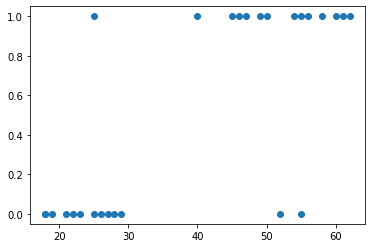

In [190]:
plt.scatter(df_insurance["age"],df_insurance["bought_insurance"])

In [196]:
X=df_insurance[["age"]]
y=df_insurance["bought_insurance"]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [194]:
model_log_reg=linear_model.LogisticRegression()

In [199]:
model_log=model_log_reg.fit(X_train,y_train)

In [202]:
y_predicted = model_log.predict(X_test)

In [203]:
y_predicted

array([1, 1, 0, 0, 0, 0])

**Exercise Logistic**

In [205]:
df_hr =pd.read_csv("/content/sample_data/alldata/HR_comma_sep.csv")
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [210]:
left=df_hr[df_hr["left"]==1]

In [211]:
retained=df_hr[df_hr["left"]==0]

In [213]:
df_hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


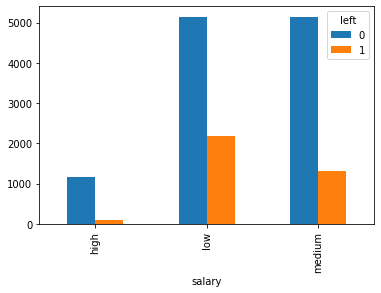

In [214]:
pd.crosstab(df_hr.salary,df_hr.left).plot(kind='bar')

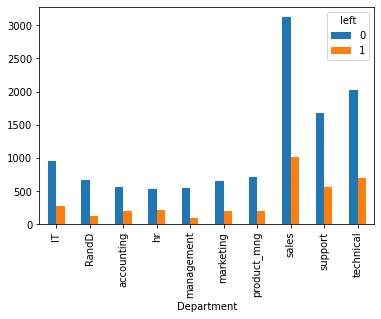

In [215]:
pd.crosstab(df_hr.Department,df_hr.left).plot(kind='bar')

In [12]:
subdf = df_hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py:338: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [13]:
subdf=pd.get_dummies(subdf,prefix="salary",drop_first="True")

In [14]:
subdf

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(subdf,df_hr["left"],train_size=0.3)

In [54]:
model_hr_reg=linear_model.LogisticRegression()

In [55]:
model_hr=model_hr_reg.fit(X_train,y_train)

In [19]:
model_hr.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [21]:

model_hr.score(X_test,y_test)

0.7753333333333333

In [58]:
y_predicted=model_hr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics imp

plot_confusion_matrix(model_hr, X_test, y_test)


# Multi class logistic

In [22]:
from sklearn.datasets import load_digits


In [23]:
dir(load_digits)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [24]:
digits = load_digits()

In [25]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
for i in range(5):
  plt.matshow(digits.images[i])

In [28]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
from sklearn import preprocessing

In [ ]:
X_scaled = preprocessing.scale(digits.data)
X_scaled[0]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,digits.target, test_size=0.2)
model_digits_reg=linear_model.LogisticRegression();
model_digits=model_digits_reg.fit(X_train,y_train)

In [45]:
p=model_digits.predict([X_scaled[]])

In [39]:
p[0]

0

In [48]:
model_digits.score(X_train, y_train)

0.9986082115518441

In [50]:
y_predicted = model_digits.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 40,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 36]])

Text(69.0, 0.5, 'Truth')

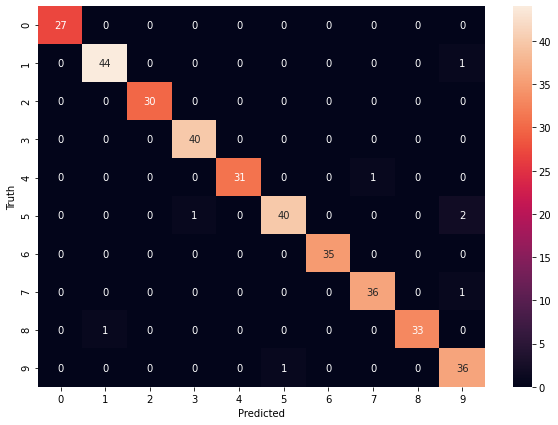

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Exercise logistic

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df_iris=iris.data

In [ ]:
df_iris.

In [6]:
df_iris = pd.DataFrame(df_iris)

In [ ]:
df_iris

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df_iris.columns =iris.feature_names

In [26]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [80]:
type(iris.target_names)

numpy.ndarray

In [9]:
df_iris_target = pd.DataFrame(iris.target)

In [25]:
df_iris_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
df_iris_target.columns=["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_iris,df_iris_target["target"], test_size=0.2)

In [22]:
model_iris_reg=linear_model.LogisticRegression()
model_iris=model_iris_reg.fit(X_train,y_train)

In [23]:
y_predict=model_iris.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]])

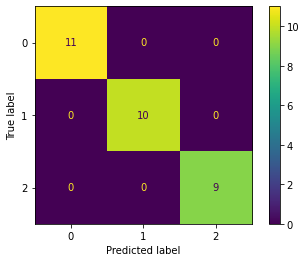

In [19]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(model_iris, X_test, y_test)

In [20]:
model_iris.score( X_test, y_test)

1.0

In [27]:
df_dt =pd.read_csv("/content/sample_data/alldata/salary_dt.csv")

In [28]:
df_dt.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model_dt_reg=DecisionTreeClassifier()

In [34]:
from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()


In [36]:
df_dt['company_n'] = le_company.fit_transform(df_dt['company'])
df_dt['job_n'] = le_job.fit_transform(df_dt['job'])
df_dt['degree_n'] = le_degree.fit_transform(df_dt['degree'])

In [37]:
df_dt.head()

,company,job,degree,salary_more_then_100k,company_n,job_n,degree_n
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0


In [38]:
X=df_dt[["company_n",	"job_n",	"degree_n"]]

In [39]:
y=df_dt["salary_more_then_100k"]

In [41]:
model_dt_reg=DecisionTreeClassifier()
model_dt=model_dt_reg.fit(X,y)

# Exercise dession tree


In [48]:
df_titanic=pd.read_csv("/content/sample_data/alldata/titanic.csv")

In [51]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df_titanic=df_titanic[["Survived","Pclass","Sex","Age","Fare"]]

In [59]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [ ]:
df_titanic.Age = df_titanic.Age.fillna(df_titanic.Age.mean())

In [72]:
df_titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [74]:
from sklearn.preprocessing import LabelEncoder

le_Sex=LabelEncoder()
df_titanic["Sex"] = le_Sex.fit_transform(df_titanic["Sex"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
X=df_titanic.drop(["Survived"],axis="columns")

In [76]:
y=df_titanic["Survived"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [78]:
model_titanic_reg=DecisionTreeClassifier();

In [79]:
model_titanic=model_titanic_reg.fit(X_train,y_train)

In [80]:
model_titanic

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
y_predict=model_titanic.predict(X_test)

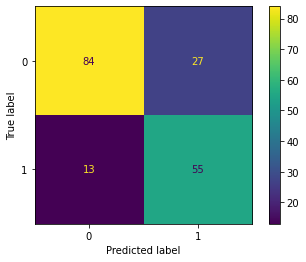

In [83]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(model_titanic, X_test, y_test)

# Support Vector machines 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
from sklearn.datasets import load_iris

In [87]:
data=load_iris()

In [88]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [90]:
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
df_iris['target'] = iris.target

In [94]:
df_iris['flower_name'] =df_iris.target.apply(lambda x: iris.target_names[x])

In [95]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [101]:
df0=df_iris[:50]
df1=df_iris[50:100]
df2=df_iris[100:]

In [98]:
%matplotlib inline

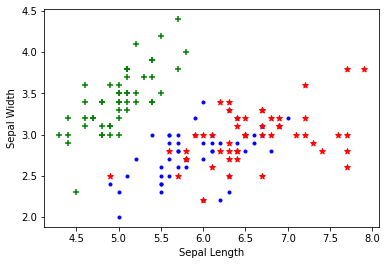

In [102]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='*')

In [105]:
X=df_iris.drop(["target","flower_name"],axis="columns")
y=df_iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [107]:
from sklearn.svm import SVC

In [108]:
model_iris_svc_reg=SVC()

In [109]:
model_iris_svc=model_iris_svc_reg.fit(X_train,y_train)

In [110]:
model_iris_svc.score(X_test,y_test)

0.9666666666666667

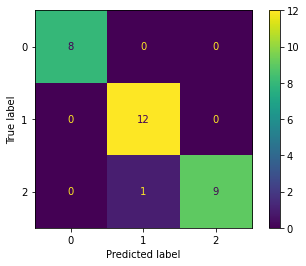

In [111]:
plot_confusion_matrix(model_iris_svc, X_test, y_test)

# Random Forest

In [113]:
from sklearn.datasets import load_digits

In [114]:
data =load_digits()

In [115]:
dir(data)

['DESCR', 'data', 'images', 'target', 'target_names']

In [116]:
df_rf=pd.DataFrame(data.data)

In [117]:
df_rf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [120]:
X=df_rf
y=data["target"]

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [123]:
model_rf_reg=RandomForestClassifier()

In [124]:
model_rf=model_rf_reg.fit(X_train,y_train)

In [125]:
y_predict=model_rf.predict(X_test)

In [126]:
y_predict

array([7, 1, 1, 1, 4, 8, 2, 9, 4, 1, 9, 8, 7, 6, 3, 3, 3, 0, 9, 1, 3, 1,
       5, 6, 6, 3, 9, 1, 0, 3, 1, 3, 0, 4, 2, 4, 6, 7, 8, 5, 5, 6, 8, 0,
       5, 2, 0, 6, 6, 0, 7, 3, 9, 2, 3, 9, 2, 1, 6, 0, 6, 1, 2, 4, 6, 7,
       1, 1, 2, 8, 6, 7, 9, 4, 6, 5, 9, 9, 7, 3, 6, 2, 8, 9, 6, 4, 6, 5,
       5, 3, 6, 8, 0, 8, 1, 9, 5, 6, 8, 7, 3, 0, 2, 2, 6, 8, 4, 6, 6, 7,
       2, 6, 6, 4, 3, 1, 1, 0, 5, 8, 5, 3, 1, 9, 9, 8, 9, 0, 7, 8, 5, 8,
       9, 8, 9, 1, 7, 3, 4, 5, 1, 8, 4, 1, 7, 9, 7, 7, 0, 9, 1, 2, 9, 1,
       9, 2, 0, 4, 1, 3, 8, 3, 1, 3, 3, 4, 6, 7, 8, 2, 7, 6, 7, 5, 5, 3,
       6, 7, 9, 7, 1, 6, 4, 6, 1, 8, 7, 4, 3, 9, 0, 6, 8, 0, 4, 3, 2, 4,
       9, 7, 3, 8, 5, 5, 6, 3, 8, 0, 7, 0, 5, 9, 2, 5, 9, 0, 5, 6, 8, 1,
       6, 5, 9, 5, 6, 8, 6, 1, 3, 0, 6, 2, 2, 6, 3, 7, 2, 8, 7, 6, 7, 0,
       2, 8, 9, 5, 0, 8, 1, 6, 8, 2, 0, 2, 5, 0, 2, 2, 7, 8, 4, 8, 5, 9,
       2, 8, 4, 5, 3, 4, 1, 6, 6, 9, 7, 0, 6, 6, 6, 8, 1, 3, 0, 8, 0, 7,
       7, 5, 6, 5, 0, 2, 9, 8, 8, 7, 6, 0, 8, 2, 7,

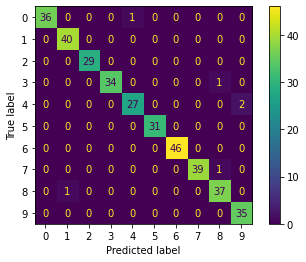

In [128]:
plot_confusion_matrix(model_rf, X_test, y_test)

In [129]:
model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<Figure size 432x288 with 0 Axes>

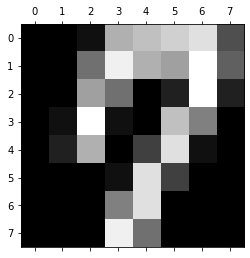

In [146]:
plt.gray()
plt.matshow(data.images[467])

In [133]:
y_predict_all=model_rf.predict(X)

In [134]:
len(y_predict_all)

1797

In [144]:
y_predict_all[467]

8

# K fold cross validation

In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [148]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [149]:
digits = load_digits()

In [150]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [151]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9444444444444444

In [152]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5296296296296297

In [153]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9703703703703703

K fold

In [154]:
from sklearn.model_selection import KFold

In [155]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [156]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [157]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [158]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [159]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [160]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

CROSS  FOLD VALIDATIO

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [164]:
cross_val_score(SVC(gamma="auto"), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [168]:
score1=cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target,cv=3)
score1=np.average(score1)
print(score1)

0.9309961046188091


In [170]:
score2=cross_val_score(RandomForestClassifier(n_estimators=10), digits.data, digits.target,cv=3)
score2=np.average(score2)
print(score2)

0.895937673900946


In [171]:
score3=cross_val_score(RandomForestClassifier(n_estimators=100), digits.data, digits.target,cv=3)
score3=np.average(score3)
print(score3)

0.9415692821368947


# k means clustering


In [179]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [173]:
df_kmeans=pd.read_csv("/content/sample_data/alldata/income.csv")

In [176]:
df_kmeans.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

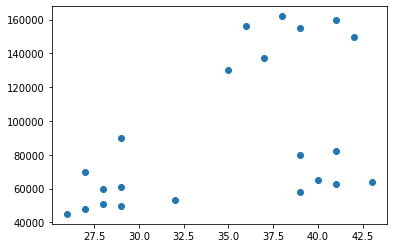

In [177]:
plt.scatter(df_kmeans['Age'],df_kmeans['Income($)'])

In [180]:
km =KMeans(n_clusters=3)

In [183]:
y_predicted=km.fit_predict(df_kmeans[["Age","Income($)"]])

In [184]:
df_kmeans['cluster']=y_predicted
df_kmeans.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


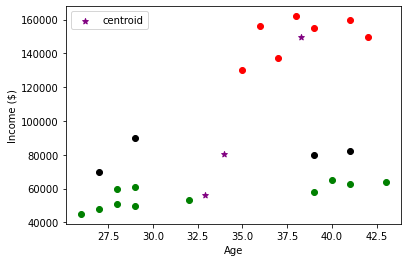

In [186]:
df1 = df_kmeans[df_kmeans.cluster==0]
df2 = df_kmeans[df_kmeans.cluster==1]
df3 = df_kmeans[df_kmeans.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [188]:
scaler = MinMaxScaler()

scaler.fit(df_kmeans[['Income($)']])
df_kmeans['Income($)'] = scaler.transform(df_kmeans[['Income($)']])

scaler.fit(df_kmeans[['Age']])
df_kmeans['Age'] = scaler.transform(df_kmeans[['Age']])

# feture standarisation

In [189]:
df_kmeans=pd.read_csv("/content/sample_data/alldata/income.csv")

In [190]:
df_kmeans=df_kmeans[["Age",'Income($)']]

In [191]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_kmeans_scaled = sc.fit_transform(df_kmeans)


In [192]:
df_kmeans_scaled

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.17647059, 0.13675214],
       [0.11764706, 0.12820513],
       [0.94117647, 0.8974359 ],
       [0.76470588, 0.94017094],
       [0.88235294, 0.98290598],
       [0.70588235, 1.        ],
       [0.58823529, 0.94871795],
       [0.52941176, 0.72649573],
       [0.64705882, 0.78632479],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.11764706, 0.05128205],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.16239316],
       [0.76470588, 0.2991453 ],
       [0.88235294, 0.31623932],
       [0.76470588, 0.11111111]])

In [193]:
type(df_kmeans_scaled)

numpy.ndarray

In [196]:
df_kmeans_scaled=pd.DataFrame(df_kmeans_scaled)

In [199]:
df_kmeans_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [198]:
df_kmeans_scaled.columns=["Age","Income($)"]

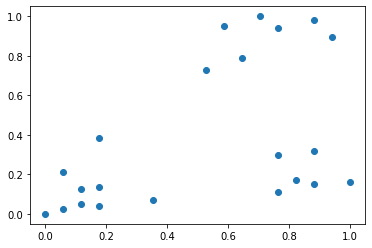

In [201]:
plt.scatter(df_kmeans_scaled['Age'],df_kmeans_scaled['Income($)'])

In [202]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_kmeans_scaled[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [203]:
df_kmeans_scaled['cluster']=y_predicted

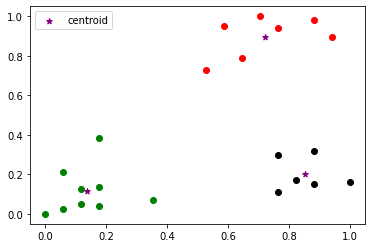

In [205]:
df1 = df_kmeans_scaled[df_kmeans_scaled.cluster==0]
df2 = df_kmeans_scaled[df_kmeans_scaled.cluster==1]
df3 = df_kmeans_scaled[df_kmeans_scaled.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [206]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_kmeans_scaled[['Age','Income($)']])
    sse.append(km.inertia_)

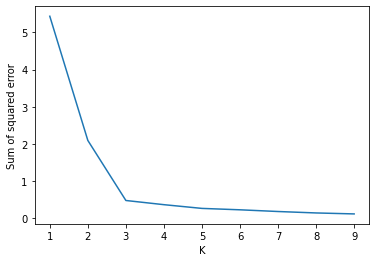

In [207]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)